<p>
Homework: https://work.caltech.edu/homework/hw5.pdf
<p>
Answers:
1. c
2. e --> d &#x2714;
3. c
4. e
5. d
6. e
7. a
8. a --> d &#x2714;
9. d --> a &#x2714;
10. e

<p>
Answer key: https://work.caltech.edu/homework/hw5_sol.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
# Question 1
def expected_error(sigma, d, N):
    return sigma*sigma*(1.0 - (d+1)/N)

for N in [10, 25, 100, 500, 1000]:
    print "N: {}, expected_error: {}".format(N, expected_error(0.1, 8.0, N))

N: 10, expected_error: 0.001
N: 25, expected_error: 0.0064
N: 100, expected_error: 0.0091
N: 500, expected_error: 0.00982
N: 1000, expected_error: 0.00991


In [3]:
# Question 4 - 7
def error(u, v):
    return (u * np.exp(v) - 2.0 * v * np.exp(-u))**2.0

def derivative_u(u, v):
    return 2 * (np.exp(v) + 2.0 * v * np.exp(-u)) * (u * np.exp(v) - 2.0 * v * np.exp(-u))

def derivative_v(u, v):
    return 2 * (u * np.exp(v) - 2.0 * np.exp(-u)) * (u * np.exp(v) - 2.0 * v * np.exp(-u))

In [4]:
# Question 5
def gradient_descent_update(u, v, rate=0.1):
    return u - rate * derivative_u(u, v), v - rate * derivative_v(u, v)

u = v = 1
for iter in range(1, 18):
    u, v = gradient_descent_update(u, v)
    print "{}: ({}, {}) ---> {}".format(iter, u, v, error(u, v))

1: (-0.369542993197, 0.213920553625) ---> 1.15950972997
2: (0.0305206903513, -0.507934045444) ---> 1.00740748296
3: (0.107523114199, -0.122210255574) ---> 0.0990091216273
4: (0.0656448258149, -0.0151665598769) ---> 0.00866064536281
5: (0.0478411706217, 0.0184898992267) ---> 0.000181755791728
6: (0.0449994630994, 0.0234992516968) ---> 1.29723984784e-06
7: (0.0447560190293, 0.0239242964704) ---> 7.29152469846e-09
8: (0.0447377460407, 0.0239561747966) ---> 4.00999789056e-11
9: (0.0447363908175, 0.0239585389222) ---> 2.20168344841e-13
10: (0.0447362903978, 0.0239587140991) ---> 1.20868339442e-15
11: (0.0447362829574, 0.0239587270786) ---> 6.63538771654e-18
12: (0.0447362824061, 0.0239587280403) ---> 3.64266952049e-20
13: (0.0447362823652, 0.0239587281115) ---> 1.99973989279e-22
14: (0.0447362823622, 0.0239587281168) ---> 1.09781367583e-24
15: (0.044736282362, 0.0239587281172) ---> 6.02678098972e-27
16: (0.044736282362, 0.0239587281172) ---> 3.30894505228e-29
17: (0.044736282362, 0.02395872

In [5]:
# Question 7
def coordinate_descent_update_u(u, v, rate=0.1):
    return u - rate * derivative_u(u, v), v

def coordinate_descent_update_v(u, v, rate=0.1):
    return u, v - rate * derivative_v(u, v)

u = v = 1
for iter in range(1, 16):
    u, v = coordinate_descent_update_u(u, v)
    print "{} part 1: ({}, {}) ---> {}".format(iter, u, v, error(u, v))
    u, v = coordinate_descent_update_v(u, v)
    print "{} part 2: ({}, {}) ---> {}".format(iter, u, v, error(u, v))

1 part 1: (-0.369542993197, 1) ---> 15.1996144023
1 part 2: (-0.369542993197, -2.03992288047) ---> 34.2901631123
2 part 1: (6.3924737648, -2.03992288047) ---> 0.702410498734
2 part 2: (6.3924737648, -2.17869889007) ---> 0.534142591372
3 part 1: (6.37699523444, -2.17869889007) ---> 0.531750709999
3 part 2: (6.37699523444, -2.28347262063) ---> 0.432660827324
4 part 1: (6.36460748637, -2.28347262063) ---> 0.431128410626
4 part 2: (6.36460748637, -2.36821379387) ---> 0.365039735019
5 part 1: (6.35427658624, -2.36821379387) ---> 0.363973766947
5 part 2: (6.35427658624, -2.43959481416) ---> 0.31646807536
6 part 1: (6.34542086477, -2.43959481416) ---> 0.315684698225
6 part 2: (6.34542086477, -2.50137527574) ---> 0.279763423064
7 part 1: (6.3376780617, -2.50137527574) ---> 0.279164513035
7 part 2: (6.3376780617, -2.55589956861) ---> 0.250986311675
8 part 1: (6.33080628124, -2.55589956861) ---> 0.250514534262
8 part 2: (6.33080628124, -2.6047348478) ---> 0.227783298944
9 part 1: (6.32463553422,

In [38]:
# Questions 8 and 9
class Line:
    '''A line that passes through the first two points of the given array'''
    def __init__(self, x1_s, x2_s, weights=None, name="Unknown"):
        self.name = name
        if weights is not None:
            assert len(weights) == 3
            w0, w1, w2 = weights
            if w2 != 0:
                w0 /= w2
                w1 /= w2
            self.intercept = -w0
            self.slope = -w1
        else:
            assert len(x1_s) == 2
            assert len(x2_s) == 2
            self.slope = (x2_s[1]-x2_s[0])/(x1_s[1]-x1_s[0])
            self.intercept = x2_s[0] - self.slope * x1_s[0]
    
    def get_y(self, x):
        return self.intercept + self.slope * x
    
    def get_sign(self, x1, x2):
        return np.sign(- self.intercept - self.slope*x1 + x2 )
    
    def get_weights(self):
        return np.array([-self.intercept, -self.slope, 1])

def generate_target_function(x_min, x_max, name = "Target"):
    x1 = list(np.random.uniform(x_min, x_max, size=2))
    x2 = list(np.random.uniform(x_min, x_max, size=2))
    return Line(x1, x2, name=name)

def generate_sample(target_function, N):
    sample_x1 = list(np.random.uniform(x_min, x_max, size=N))
    sample_x2 = list(np.random.uniform(x_min, x_max, size=N))
    sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(sample_x1, sample_x2)]
    return sample_x1, sample_x2, sample_y

def cross_entropy_error(X, y, weights):
    return np.mean(np.log(1 + np.exp(-np.dot(X, weights) * y.T)))

def gradient(X, y, weights):
    return -np.mean((X * y)/(1 + np.exp(np.dot(X, weights) * y.T)).T, axis = 0)

def update(X, y, weights, rate=0.01):
    g = gradient(X, y, weights)
    new_weights = weights - rate * g
    return new_weights

def batch_gradient_descent(X, y, weights, max_iter=50000, magnitude_threshold=0.01):
    w = weights
    for iter in range(max_iter):
        old_w = w
        w = update(X, y, w)
        if np.linalg.norm(old_w - w) < magnitude_threshold:
            break
    return w, iter+1

def stochastic_gradient_descent(X, y, weights, max_iter=50000, magnitude_threshold=0.01):
    w = weights
    for iter in range(max_iter):
        old_w = w
        for i in np.random.permutation(range(np.size(X, 0))):
            w = update(X[[i]], y[[i]], w)
        if np.linalg.norm(old_w - w) < magnitude_threshold:
            break
    return w, iter+1

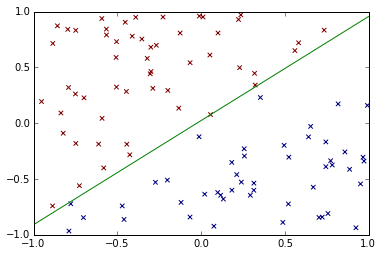

In [39]:
x_min = -1
x_max = 1
target_function = generate_target_function(x_min, x_max, name = "Target")

N = 100
sample_x1, sample_x2, sample_y = generate_sample(target_function, N)

plt.axis([x_min, x_max, x_min, x_max])
#plt.scatter(target_function_x1, target_function_x2, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

In [40]:
X = np.column_stack((np.ones(np.size(sample_x1)), sample_x1, sample_x2))
y = np.array([sample_y]).T
init_weights = [0, 0, 0]
print "Error: {}".format(cross_entropy_error(X, y, init_weights))

Error: 0.69314718056


In [41]:
batch_weights, iterations = batch_gradient_descent(X, y, init_weights)
batch_weights /= batch_weights[-1]
print "Batch weights (after {} iterations): {}\nError: {}".format(iterations, batch_weights, cross_entropy_error(X, y, batch_weights))

Batch weights (after 1 iterations): [ 0.12553275 -0.69804561  1.        ]
Error: 0.414177212682


In [42]:
stochastic_weights, iterations = stochastic_gradient_descent(X, y, init_weights)
stochastic_weights /= stochastic_weights[-1]
print "Stochastic weights (after {} iterations): {}\nError: {}".format(iterations, stochastic_weights, cross_entropy_error(X, y, stochastic_weights))

Stochastic weights (after 268 iterations): [ 0.08521895 -0.76291339  1.        ]
Error: 0.408217334557


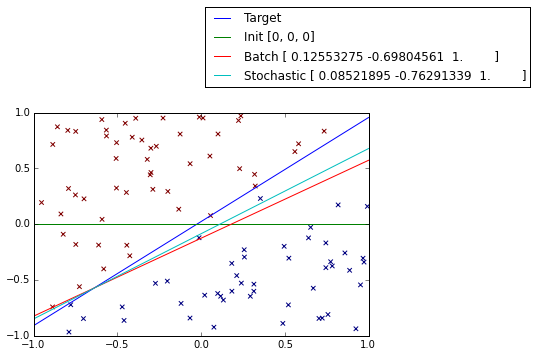

In [43]:
init_function = Line(None, None, init_weights, name="Init {}".format(init_weights))
batch_function = Line(None, None, batch_weights, name = "Batch {}".format(batch_weights))
stochastic_function = Line(None, None, stochastic_weights, name = "Stochastic {}".format(stochastic_weights))

plt.axis([x_min, x_max, x_min, x_max])
#plt.scatter(target_function_x1, target_function_x2, color='#006400')
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')
for function in [target_function, init_function, batch_function, stochastic_function]:
    plt.plot([x_min, x_max], [function.get_y(x_min), function.get_y(x_max)], label=function.name)
plt.legend(bbox_to_anchor=(1.5, 1.5))

In [44]:
N = 1000
out_sample_x1, out_sample_x2, out_sample_y = generate_sample(target_function, N)
X_out = np.column_stack((np.ones(np.size(out_sample_x1)), out_sample_x1, out_sample_x2))
y_out = np.array([out_sample_y]).T
predictions = np.array([[stochastic_function.get_sign(x[1], x[2]) for x in X_out]]).T
misclassified = predictions != y_out
out_sample_error = 1.0 * misclassified.sum()/len(misclassified)
out_sample_error

0.069

In [45]:
def run_experiment(num_runs=100):
    x_min = -1
    x_max = 1

    E_out = 0
    avg_iterations = 0
    for i in range(num_runs):
        
        target_function = generate_target_function(x_min, x_max, name = "Target")

        N = 100
        sample_x1, sample_x2, sample_y = generate_sample(target_function, N)
        X = np.column_stack((np.ones(np.size(sample_x1)), sample_x1, sample_x2))
        y = np.array([sample_y]).T

        init_weights = [0, 0, 0]
        stochastic_weights, iterations = stochastic_gradient_descent(X, y, init_weights)
        
        N_out = 1000
        out_sample_x1, out_sample_x2, out_sample_y = generate_sample(target_function, N_out)
        X_out = np.column_stack((np.ones(np.size(out_sample_x1)), out_sample_x1, out_sample_x2))
        y_out = np.array([out_sample_y]).T

        out_sample_error = cross_entropy_error(X_out, y_out, stochastic_weights)
        
        E_out += out_sample_error
        avg_iterations += iterations
        
    E_out /= num_runs
    avg_iterations /= num_runs
    print "Avg error_out: {} (after {} iterations)".format(E_out, avg_iterations)
    return E_out, avg_iterations

run_experiment()

Avg error_out: 0.10130965597 (after 340 iterations)


(0.10130965596976688, 340)

In [ ]:
# Stochastic 
# Avg error_out: 16.3832864456 (after 1022 iterations)
# Batch
# Avg error_out: 1.48631164758 (after 120 iterations)